In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
steel=pd.read_csv("Steel_industry_data.csv")

In [3]:
steel.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [4]:
steel.shape

(35040, 11)

In [5]:
steel.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [6]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [7]:
steel.nunique()

date                                    35040
Usage_kWh                                3343
Lagging_Current_Reactive.Power_kVarh     1954
Leading_Current_Reactive_Power_kVarh      768
CO2(tCO2)                                   8
Lagging_Current_Power_Factor             5079
Leading_Current_Power_Factor             3366
NSM                                        96
WeekStatus                                  2
Day_of_week                                 7
Load_Type                                   3
dtype: int64

In [8]:
steel.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [9]:
steel.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


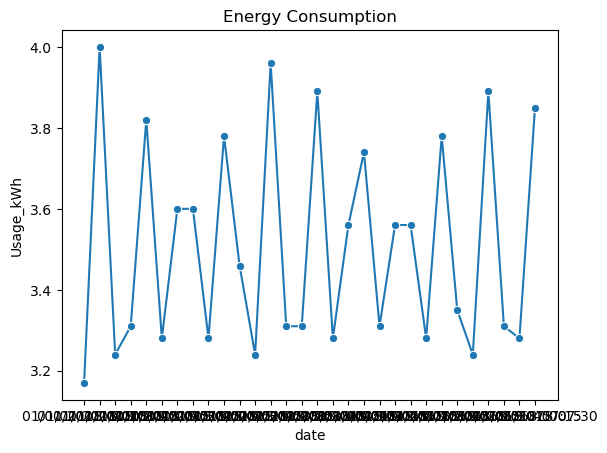

In [10]:
sns.lineplot(data=steel[:30],x='date',y='Usage_kWh',marker='o')
plt.xlabel('date')
plt.ylabel('Usage_kWh')
plt.title('Energy Consumption')
plt.show()

<Axes: xlabel='Lagging_Current_Reactive.Power_kVarh', ylabel='Usage_kWh'>

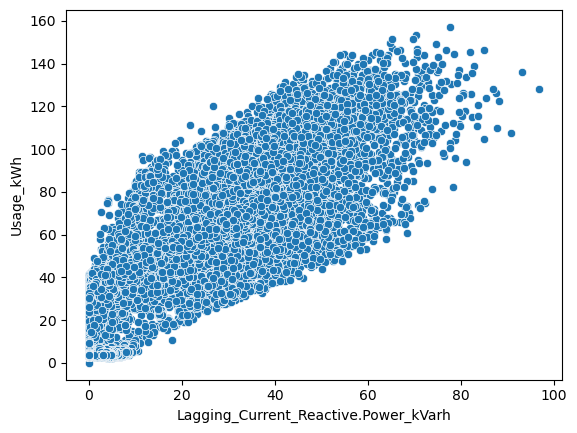

In [11]:
sns.scatterplot(data=steel,x='Lagging_Current_Reactive.Power_kVarh',y='Usage_kWh')

<Axes: xlabel='Leading_Current_Reactive_Power_kVarh', ylabel='Usage_kWh'>

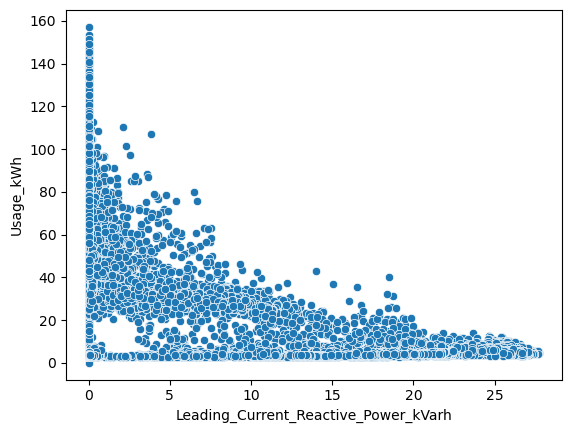

In [12]:
sns.scatterplot(data=steel,x='Leading_Current_Reactive_Power_kVarh',y='Usage_kWh')

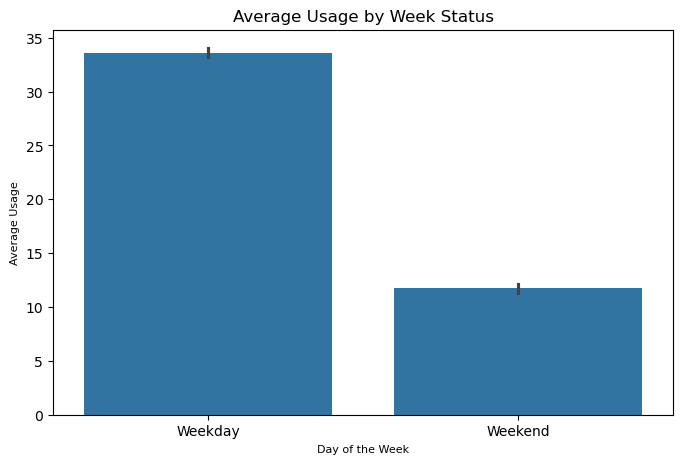

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(data=steel, x="WeekStatus", y="Usage_kWh")
plt.xlabel("Day of the Week", fontsize=8)
plt.ylabel("Average Usage", fontsize=8)
plt.title("Average Usage by Week Status", fontsize=12)
plt.show()

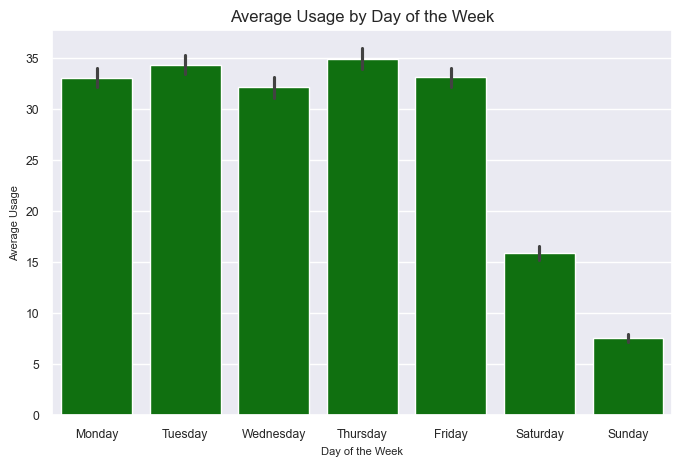

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(data=steel, x="Day_of_week", y="Usage_kWh",color='green')
plt.xlabel("Day of the Week", fontsize=8)
plt.ylabel("Average Usage", fontsize=8)
plt.title("Average Usage by Day of the Week", fontsize=12)
plt.show()

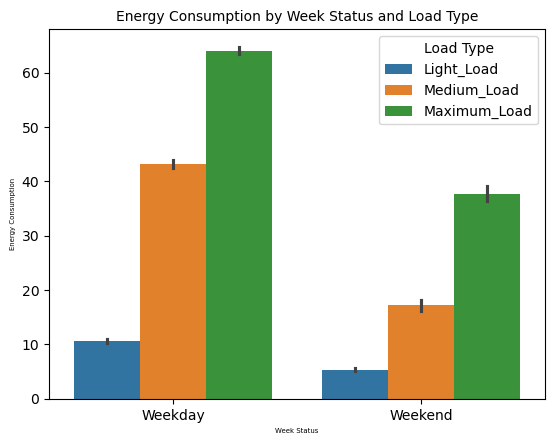

In [15]:
sns.barplot(data=steel, x="WeekStatus", y="Usage_kWh", hue="Load_Type")
plt.xlabel("Week Status", fontsize=5)
plt.ylabel("Energy Consumption", fontsize=5)
plt.title("Energy Consumption by Week Status and Load Type", fontsize=10)
plt.legend(title="Load Type", title_fontsize=10)
plt.show()

<Axes: xlabel='Lagging_Current_Reactive.Power_kVarh', ylabel='Count'>

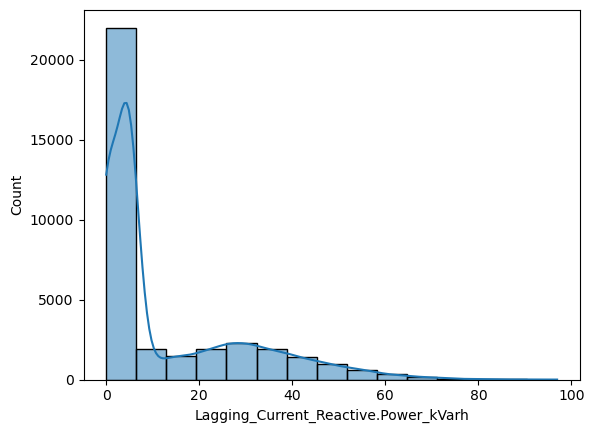

In [16]:
sns.histplot(data=steel,x='Lagging_Current_Reactive.Power_kVarh',kde=True,bins=15)

In [17]:
correlation=steel[['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']].corr()
correlation

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


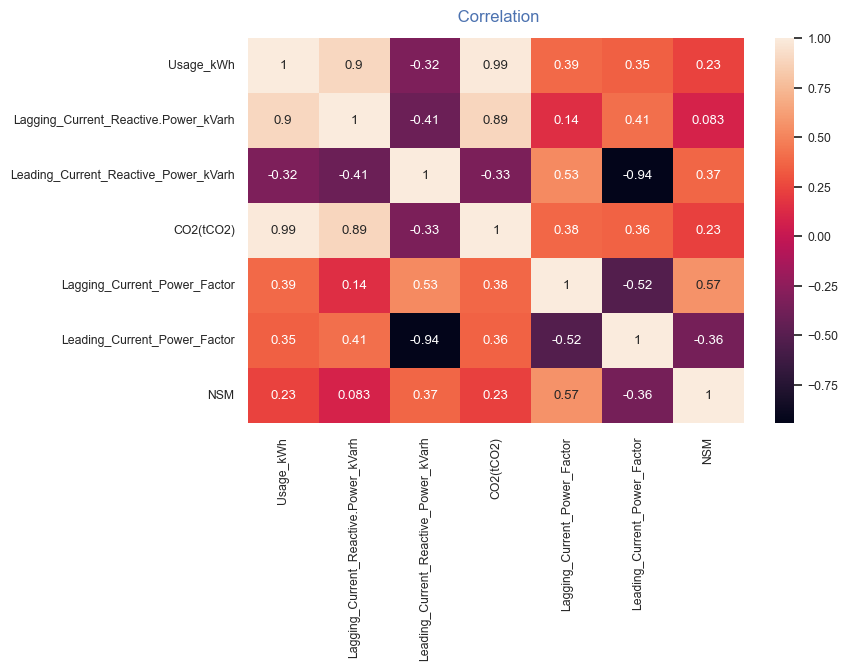

In [18]:
sns.set(font_scale=0.8)
plt.figure(figsize=(8,5))
sns.heatmap(correlation,annot=True)
plt.title(" Correlation", fontsize = 12, color = 'b', pad = 12, loc = 'center')
plt.show()

In [19]:
numerical_cols=steel.select_dtypes(include=[np.number]).columns.tolist()

In [20]:
Q1 = steel[numerical_cols].quantile(0.25)
Q3 = steel[numerical_cols].quantile(0.75)
IQR = Q3-Q1

In [21]:
lower_bound=Q1-1.5*IQR
lower_bound

Usage_kWh                                 -68.85625
Lagging_Current_Reactive.Power_kVarh      -28.21000
Leading_Current_Reactive_Power_kVarh       -3.13500
CO2(tCO2)                                  -0.03000
Lagging_Current_Power_Factor                9.76625
Leading_Current_Power_Factor               99.25000
NSM                                    -42750.00000
dtype: float64

In [22]:
upper_bound=Q3+1.5*IQR
upper_bound

Usage_kWh                                  123.29375
Lagging_Current_Reactive.Power_kVarh        53.15000
Leading_Current_Reactive_Power_kVarh         5.22500
CO2(tCO2)                                    0.05000
Lagging_Current_Power_Factor               152.57625
Leading_Current_Power_Factor               100.45000
NSM                                     128250.00000
dtype: float64

In [23]:
outliers=steel[numerical_cols][(steel[numerical_cols]<lower_bound)|(steel[numerical_cols]>upper_bound)].sum()
outliers

Usage_kWh                                43145.63
Lagging_Current_Reactive.Power_kVarh     64861.67
Leading_Current_Reactive_Power_kVarh    130465.19
CO2(tCO2)                                   26.49
Lagging_Current_Power_Factor                 0.00
Leading_Current_Power_Factor            285313.07
NSM                                          0.00
dtype: float64

In [24]:
top_outliers_cols=outliers.sort_values(ascending=False).head(5).index.tolist()

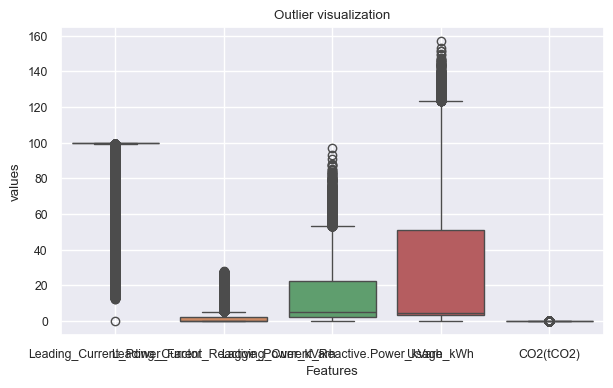

Usage_kWh                                  0
Lagging_Current_Reactive.Power_kVarh    1059
Leading_Current_Reactive_Power_kVarh    7759
CO2(tCO2)                                437
Lagging_Current_Power_Factor               0
Leading_Current_Power_Factor            8327
NSM                                        0
dtype: int64

In [25]:
plt.figure(figsize=(7,4))
sns.boxplot(data=steel[top_outliers_cols])
plt.title("Outlier visualization")
plt.xlabel("Features")
plt.ylabel("values")
plt.grid(True)
plt.show()
for col in numerical_cols:
    lower_clip=steel[col].quantile(0.01)
    upper_clip=steel[col].quantile(0.99)
    steel[col]=steel[col].clip(lower=lower_clip, upper=upper_clip)

outliers_after=((steel[numerical_cols]<lower_bound)|(steel[numerical_cols]>upper_bound)).sum()
outliers_after

In [26]:
steel

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
